# MNIST

In [1]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../Datasets/MNIST_data/", one_hot=True)

Extracting ../Datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../Datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../Datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../Datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

In [3]:
trN, teN = mnist.train.num_examples, mnist.test.num_examples
print(trN, teN)

55000 10000


In [4]:
print("Train")
print(trX.shape)
#print(trX[0])
print(trY.shape)
print(trY[0])

print("Test")
print(teX.shape)
print(teY.shape)

Train
(55000, 784)
(55000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Test
(10000, 784)
(10000, 10)


In [5]:
trX = trX.reshape(-1, 28, 28) # (55000, 28, 28)
print(trX.shape)

(55000, 28, 28)


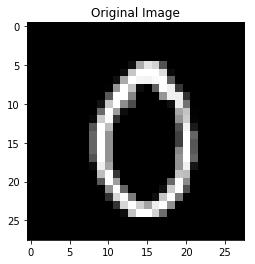

In [7]:
"""
Prints the image
Input: image pixels in list
"""
from matplotlib import pyplot as plt

def print_image(image, title):
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(title)
    #plt.colorbar()
    plt.show()

print_image(trX[5700], "Original Image")

# CIFAR-10

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # GT: why Normalize??

trainset = torchvision.datasets.CIFAR10(root='../Datasets/CIFAR-10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../Datasets/CIFAR-10', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [10]:
# Data is loaded in batches and each batch contains 4 images.

print("Train")
print(len(trainloader)) # 12,500 batches (50,000 images)
dataiter = iter(trainloader)
row1 = dataiter.next()
print(len(row1[0])) # 4 # batch_size # It has the 4 labels between 0 to 9 -- ??? Should be images
print(len(row1[0][0])) # 3 # 3-channel color 
print(len(row1[0][0][0])) # 32 pixels
print(len(row1[0][0][0][0])) # 32 pixels
print(row1[0][0][0].type())
print(row1[0][0][0].size())

#print(trX[0])
# print(trY.shape)
# print(trY[0])

# print("Test")
# print(teX.shape)
# print(teY.shape)

# print(len(trainloader))
# dataiter = iter(trainloader)
# row1 = dataiter.next()

# print(len(row1[0])) # 4 # batch_size # It has the 4 labels between 0 to 9
# print(len(row1[0][0])) # 3 # 3-channel color 
# print(len(row1[0][0][0])) # 32 pixels
# print(len(row1[0][0][0][0])) # 32 pixels
# print(row1[0][0][0].type())
# print(row1[0][0][0].size())

# print("")
# print(len(testloader))

Train
12500
4
3
32
32
torch.FloatTensor
torch.Size([32, 32])


In [1]:
# Process images of this size. Note that this differs from the original CIFAR
# image size of 32 x 32. If one alters this number, then the entire model
# architecture will change and any model would need to be retrained.
IMAGE_SIZE = 24

# Global constants describing the CIFAR-10 data set.
NUM_CLASSES = 10
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = 50000
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = 10000

DATA_URL = 'http://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz'

In [2]:
import os, sys, tarfile
import tensorflow as tf
from six.moves import urllib

def maybe_download_and_extract():
    """Download and extract the tarball from Alex's website."""
    #dest_directory = 'data/cifar10_data'
    dest_directory = '../Datasets/CIFAR-10'
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\r>> Downloading %s %.1f%%' % (filename, float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print()
        statinfo = os.stat(filepath)
        print('Successfully downloaded', filename, statinfo.st_size, 'bytes.')
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

maybe_download_and_extract()

def read_cifar10(filename_queue):
  """Reads and parses examples from CIFAR10 data files.
  Recommendation: if you want N-way read parallelism, call this function
  N times.  This will give you N independent Readers reading different
  files & positions within those files, which will give better mixing of
  examples.
  Args:
    filename_queue: A queue of strings with the filenames to read from.
  Returns:
    An object representing a single example, with the following fields:
      height: number of rows in the result (32)
      width: number of columns in the result (32)
      depth: number of color channels in the result (3)
      key: a scalar string Tensor describing the filename & record number
        for this example.
      label: an int32 Tensor with the label in the range 0..9.
      uint8image: a [height, width, depth] uint8 Tensor with the image data
  """

  class CIFAR10Record(object):
    pass
  result = CIFAR10Record()

  # Dimensions of the images in the CIFAR-10 dataset.
  # See http://www.cs.toronto.edu/~kriz/cifar.html for a description of the
  # input format.
  label_bytes = 1  # 2 for CIFAR-100
  result.height = 32
  result.width = 32
  result.depth = 3
  image_bytes = result.height * result.width * result.depth
  # Every record consists of a label followed by the image, with a
  # fixed number of bytes for each.
  record_bytes = label_bytes + image_bytes

  # Read a record, getting filenames from the filename_queue.  No
  # header or footer in the CIFAR-10 format, so we leave header_bytes
  # and footer_bytes at their default of 0.
  reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)
  result.key, value = reader.read(filename_queue)

  # Convert from a string to a vector of uint8 that is record_bytes long.
  record_bytes = tf.decode_raw(value, tf.uint8)

  # The first bytes represent the label, which we convert from uint8->int32.
  result.label = tf.cast(
      tf.slice(record_bytes, [0], [label_bytes]), tf.int32)

  # The remaining bytes after the label represent the image, which we reshape
  # from [depth * height * width] to [depth, height, width].
  depth_major = tf.reshape(tf.slice(record_bytes, [label_bytes], [image_bytes]),
                           [result.depth, result.height, result.width])
  # Convert from [depth, height, width] to [height, width, depth].
  result.uint8image = tf.transpose(depth_major, [1, 2, 0])

  return result

def _generate_image_and_label_batch(image, label, min_queue_examples,
                                    batch_size):
  """Construct a queued batch of images and labels.
  Args:
    image: 3-D Tensor of [height, width, 3] of type.float32.
    label: 1-D Tensor of type.int32
    min_queue_examples: int32, minimum number of samples to retain
      in the queue that provides of batches of examples.
    batch_size: Number of images per batch.
  Returns:
    images: Images. 4D tensor of [batch_size, height, width, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
  """
  # Create a queue that shuffles the examples, and then
  # read 'batch_size' images + labels from the example queue.
  num_preprocess_threads = 16
  images, label_batch = tf.train.shuffle_batch(
      [image, label],
      batch_size=batch_size,
      num_threads=num_preprocess_threads,
      capacity=min_queue_examples + 3 * batch_size,
      min_after_dequeue=min_queue_examples)

  # Display the training images in the visualizer.

  return images, tf.reshape(label_batch, [batch_size])

def inputs(eval_data, data_dir, batch_size):
  """Construct input for CIFAR evaluation using the Reader ops.
  Args:
    eval_data: bool, indicating if one should use the train or eval data set.
    data_dir: Path to the CIFAR-10 data directory.
    batch_size: Number of images per batch.
  Returns:
    images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
  """
  if not eval_data:
    filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i)
                 for i in xrange(1, 6)]
    num_examples_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN
  else:
    filenames = [os.path.join(data_dir, 'test_batch.bin')]
    num_examples_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_EVAL

  for f in filenames:
    if not tf.gfile.Exists(f):
      raise ValueError('Failed to find file: ' + f)

  # Create a queue that produces the filenames to read.
  filename_queue = tf.train.string_input_producer(filenames)

  # Read examples from files in the filename queue.
  read_input = read_cifar10(filename_queue)
  reshaped_image = tf.cast(read_input.uint8image, tf.float32)

  height = IMAGE_SIZE
  width = IMAGE_SIZE

  # Image processing for evaluation.
  # Crop the central [height, width] of the image.
  resized_image = tf.image.resize_image_with_crop_or_pad(reshaped_image,
                                                         width, height)

  # Subtract off the mean and divide by the variance of the pixels.
  #float_image = tf.image.per_image_whitening(resized_image)
  float_image = tf.image.per_image_standardization(resized_image)

  # Ensure that the random shuffling has good mixing properties.
  min_fraction_of_examples_in_queue = 0.4
  min_queue_examples = int(num_examples_per_epoch *
                           min_fraction_of_examples_in_queue)

  # Generate a batch of images and labels by building up a queue of examples.
  images, labels = _generate_image_and_label_batch(float_image, read_input.label,
                                                   min_queue_examples, batch_size)

  #tf.image_summary('val_images', images)
  tf.summary.image('val_images', images)

  return images, labels

In [3]:
data_dir = '../Datasets/CIFAR-10/cifar-10-batches-bin'
val_images, val_labels = inputs(eval_data=True, data_dir=data_dir, batch_size=100)

In [4]:
val_images

<tf.Tensor 'shuffle_batch:0' shape=(100, 24, 24, 3) dtype=float32>

In [5]:
val_labels

<tf.Tensor 'Reshape_2:0' shape=(100,) dtype=int32>

In [ ]:
sess = tf.Session()
print(sess.run(val_images))